In [53]:
import pandas as pd
import numpy as np

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
sessions = pd.read_csv('sessions.csv')
transactions = pd.read_csv('transactions.csv')
product_categories = pd.read_csv('product_categories.csv')

In [56]:
# Merge product category names into transactions
transactions = transactions.merge(product_categories,
                                  left_on='prod_category_id',
                                  right_on='Product Category ID',
                                  how='left')

In [57]:
# Merge transactions into sessions (behavior + demographics)
merged = sessions.merge(transactions,
                        on=['machine_id', 'site_session_id'],
                        how='left')


In [58]:
merged.head()

,machine_id,site_session_id,user_session_id,domain_id_x,ref_domain__name,pages_viewed,duration,event_date_x,event_time_x,hoh_most_education,...,event_time_y,domain_name_y,total_transactions_2020,total_transactions_2021,total_transactions_2022,total_transactions_2023,Product Category ID,Report Category,Item Category,Item Sub-Category
0,288084937,6729633401426801739,2412880849370001,1.058424e+19,NaN,14.0,14.0,2020-01-01,0:00:02,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288912140,1092751701181111355,2412889121400001,1.058424e+19,NaN,34.0,31.0,2020-01-01,0:00:02,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,0:01:03,amazon.com,69.0,NaN,NaN,NaN,1.001001e+09,"APPAREL, ACCESSORIES & JEWELRY",APPAREL,WOMEN
3,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,0:01:03,amazon.com,69.0,NaN,NaN,NaN,1.002004e+09,"APPAREL, ACCESSORIES & JEWELRY",JEWELRY,FASHION JEWELRY
4,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,0:01:03,amazon.com,69.0,NaN,NaN,NaN,4.005017e+09,OFFICE SUPPLIES & BUSINESS MACHINES,WORKPLACE SUPPLIES,JANITORIAL SUPPLIES


In [59]:
# Clean up domain_name
merged = merged.rename(columns={'domain_name_x': 'domain_name'})
merged.drop(columns=['domain_name_y'], inplace=True)

In [60]:
merged.rename(columns={
    'event_date_x': 'session_event_date',
    'event_time_x': 'session_event_time',
    'event_date_y': 'transaction_event_date',
    'event_time_y': 'transaction_event_time',
}, inplace=True)

In [61]:
print(merged['Item Sub-Category'].isna().mean())

0.9672670778791281


In [62]:
purchases_per_user = merged.groupby('machine_id')['prod_totprice'].count().reset_index()

print(purchases_per_user['prod_totprice'].describe())

count    193557.000000
mean          3.476361
std          23.193531
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        7399.000000
Name: prod_totprice, dtype: float64


In [63]:
merged[merged['machine_id'] == 54388726].head(20)


,machine_id,site_session_id,user_session_id,domain_id_x,ref_domain__name,pages_viewed,duration,session_event_date,session_event_time,hoh_most_education,...,transaction_event_date,transaction_event_time,total_transactions_2020,total_transactions_2021,total_transactions_2022,total_transactions_2023,Product Category ID,Report Category,Item Category,Item Sub-Category
10310563,54388726,7742978211753533140,267543887260013,4.046670e+18,google.com,1.0,1.0,2022-03-11,20:40:53,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10621166,54388726,6690028203408553852,268543887260019,1.277397e+19,google.com,1.0,1.0,2022-04-26,14:53:16,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10637121,54388726,7683833601767285509,268543887260022,1.058424e+19,google.com,1.0,1.0,2022-04-28,19:00:29,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10637346,54388726,969580489672672582,268543887260022,1.058424e+19,NaN,1.0,1.0,2022-04-28,19:33:10,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10733235,54388726,3045221371382056303,269543887260015,1.058424e+19,NaN,3.0,2.0,2022-05-13,13:30:05,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10752405,54388726,4468377741469936755,269543887260016,1.058424e+19,google.com,1.0,1.0,2022-05-16,13:50:00,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10753087,54388726,3518637012400180289,269543887260017,4.046670e+18,google.com,1.0,1.0,2022-05-16,15:33:23,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10818081,54388726,3477129858857749788,269543887260028,1.058424e+19,NaN,2.0,1.0,2022-05-26,15:02:24,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11531261,54388726,4081526687533470370,273543887260001,4.046670e+18,google.com,3.0,3.0,2022-09-09,13:21:31,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11531694,54388726,6956130965027157547,273543887260002,4.046670e+18,NaN,1.0,1.0,2022-09-09,14:39:54,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
merged.columns.tolist()
# currently we don't have anything, but we should later on find better ways to handle NaNs

['machine_id',
 'site_session_id',
 'user_session_id',
 'domain_id_x',
 'ref_domain__name',
 'pages_viewed',
 'duration',
 'session_event_date',
 'session_event_time',
 'hoh_most_education',
 'census_region',
 'household_size',
 'hoh_oldest_age',
 'household_income',
 'children',
 'racial_background',
 'connection_speed',
 'hispanic',
 'zip_code',
 'domain_name',
 'prod_category_id',
 'prod_name',
 'domain_id_y',
 'prod_qty',
 'prod_totprice',
 'basket_tot',
 'transaction_event_date',
 'transaction_event_time',
 'total_transactions_2020',
 'total_transactions_2021',
 'total_transactions_2022',
 'total_transactions_2023',
 'Product Category ID',
 'Report Category',
 'Item Category',
 'Item Sub-Category']

In [65]:
merged['household_size'].unique()


array([  2.,   3.,   5.,   4.,  nan,   1.,  99., -88.])

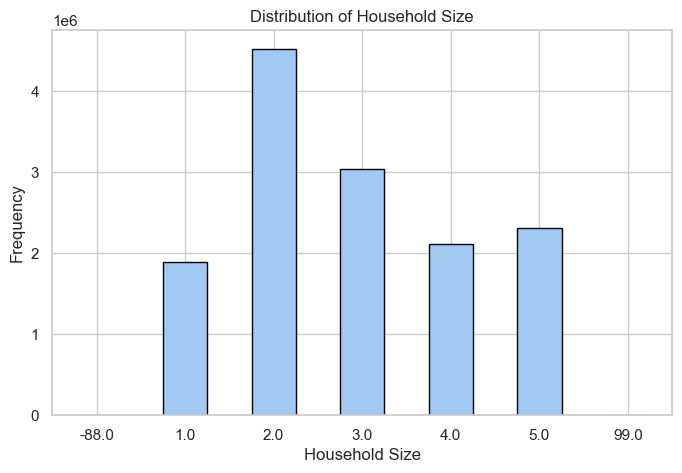

In [66]:
import matplotlib.pyplot as plt

size_counts = merged['household_size'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
size_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()



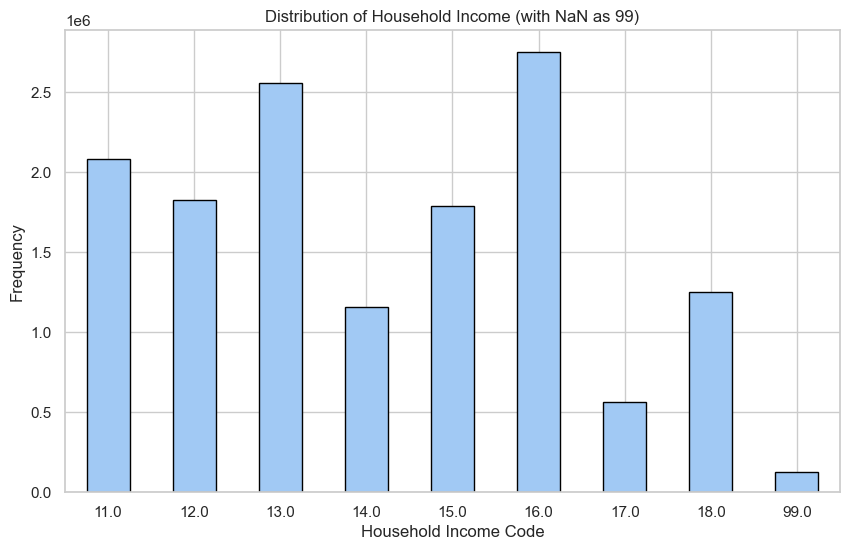

In [67]:
# Replace NaN with 99
income_data = merged['household_income'].fillna(99)

# Count frequencies
income_counts = income_data.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
income_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Household Income (with NaN as 99)')
plt.xlabel('Household Income Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()


In [69]:
# Income mapping based on the provided schema
income_map = {
    11: 20000,    # Approximate midpoint of <$25K
    12: 32000,    # $25K–$39.9K → midpoint
    13: 50000,    # $40K–$59.9K
    14: 67500,    # $60K–$74.9K
    15: 87500,    # $75K–$99.9K
    16: 125000,   # $100K–$149.9K
    17: 175000,   # $150K–$199.9K
    18: 225000,   # $200K+
    99: None      # Unknown
}

# Only use valid income codes to build this
valid_income = merged[merged['household_income'].between(11, 18)]
zip_income_map = valid_income.groupby('zip_code')['household_income'].apply(
    lambda codes: income_map[codes.mode()[0]] if not codes.mode().empty else None
).to_dict()


#based on FLP thresholds

def compute_income_group(row):
    income_code = row['household_income']
    household_size = row['household_size']
    zip_code = row['zip_code']

    # Try primary income source
    income = income_map.get(income_code, None)

    # If income is invalid or NaN, fall back to zip-based estimate
    if income is None and zip_code in zip_income_map:
        income = zip_income_map[zip_code]

    # Still invalid after zip fallback
    if income is None or household_size in [-88, 99, 0] or pd.isna(household_size):
        return 99  # Unknown group

    # Estimate per-person income
    per_capita_income = income / household_size

    # Group based on per capita income
    if per_capita_income < 20000:
        return 1  # Low
    elif per_capita_income < 40000:
        return 2  # Middle
    else:
        return 3  # High

# Apply to DataFrame
merged['income_group_adjusted'] = merged.apply(compute_income_group, axis=1)


In [70]:
merged['income_group'] = merged.apply(compute_income_group, axis=1)


# Feature Engineering per user (machine_id)
behavior = merged.groupby('machine_id').agg({
    'pages_viewed': 'mean',
    'duration': 'mean',
    'Item Category': pd.Series.nunique,  # Unique categories viewed
    'site_session_id': pd.Series.nunique,  # Total sessions
    'domain_name': pd.Series.nunique,      # Sites visited
    'income_group': 'first',
    'household_income': 'first'
}).reset_index()

behavior.rename(columns={
    'pages_viewed': 'avg_pages_viewed',
    'duration': 'avg_duration',
    'Item Category': 'unique_categories_viewed',
    'site_session_id': 'total_sessions',
    'domain_name': 'unique_domains_visited'
}, inplace=True)

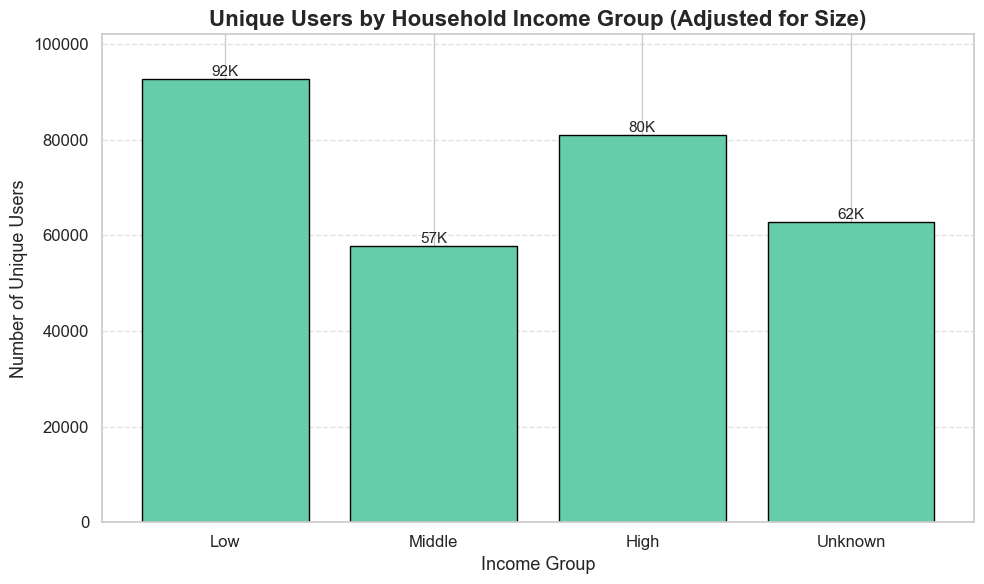

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style
sns.set(style='whitegrid', context='notebook', palette='pastel')

# Group by income group and count unique machine_ids
user_counts = merged.groupby('income_group_adjusted')['machine_id'].nunique().sort_index()

# Actual labels based on available groups
label_map = {0: 'Unknown', 1: 'Low', 2: 'Middle', 3: 'High', 99: 'Unknown'}
labels = [label_map[i] for i in user_counts.index]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, user_counts.values, color='mediumaquamarine', edgecolor='black')

# Annotate bars with count labels
for bar, count in zip(bars, user_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(count / 1e3):,}K', ha='center', va='bottom', fontsize=11)

# Titles and labels
plt.title("Unique Users by Household Income Group (Adjusted for Size)", fontsize=16, weight='bold')
plt.xlabel("Income Group", fontsize=13)
plt.ylabel("Number of Unique Users", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, user_counts.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [72]:
# Calculate Entropy of category viewing per machine_id
from scipy.stats import entropy

def calc_entropy(x):
    probs = x.value_counts(normalize=True)
    return entropy(probs)

entropy_df = merged.groupby('machine_id')['Report Category'].apply(calc_entropy).reset_index()
entropy_df.rename(columns={'Report Category': 'category_entropy'}, inplace=True)

# Merge entropy into behavior dataset
behavior = behavior.merge(entropy_df, on='machine_id', how='left')

In [73]:
# Add conversion rate (if purchase occurred in session)
merged['has_purchase'] = merged['prod_totprice'].notnull().astype(int)
conversion_df = merged.groupby('machine_id')['has_purchase'].mean().reset_index()
conversion_df.rename(columns={'has_purchase': 'conversion_rate'}, inplace=True)

behavior = behavior.merge(conversion_df, on='machine_id', how='left')

merged = merged[merged['income_group'] != 99]

In [74]:
print(behavior.head())
print(behavior.columns.tolist()) # Check the columns

   machine_id  avg_pages_viewed  avg_duration  unique_categories_viewed  \
0    54388726          3.000000      3.800000                         0   
1    76189533          1.000000      1.000000                         0   
2    76893652          3.861290      7.464286                         0   
3    81854948          2.000000      1.000000                         0   
4    82422376          4.173913      6.173913                         0   

   total_sessions  unique_domains_visited  income_group  household_income  \
0              15                       3             3              16.0   
1               1                       1             1              12.0   
2             306                       4             1              13.0   
3               1                       1             1              13.0   
4              23                       2             2              13.0   

   category_entropy  conversion_rate  
0               0.0              0.0  
1       

In [75]:
# Final DataFrame: One row per user (machine_id) with behavioral features
print(behavior.head())

   machine_id  avg_pages_viewed  avg_duration  unique_categories_viewed  \
0    54388726          3.000000      3.800000                         0   
1    76189533          1.000000      1.000000                         0   
2    76893652          3.861290      7.464286                         0   
3    81854948          2.000000      1.000000                         0   
4    82422376          4.173913      6.173913                         0   

   total_sessions  unique_domains_visited  income_group  household_income  \
0              15                       3             3              16.0   
1               1                       1             1              12.0   
2             306                       4             1              13.0   
3               1                       1             1              13.0   
4              23                       2             2              13.0   

   category_entropy  conversion_rate  
0               0.0              0.0  
1       

Cognitive Overload Signals:
- Low income → lower entropy, lower breadth, shorter duration
- High income → higher entropy, longer sessions, more exploration

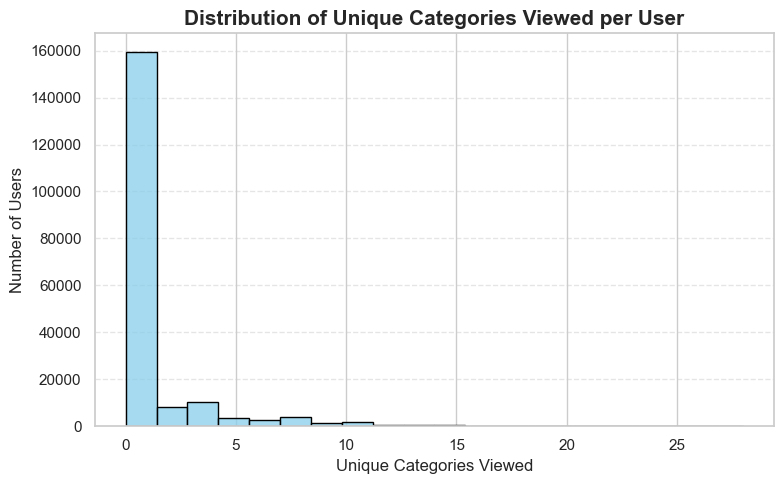

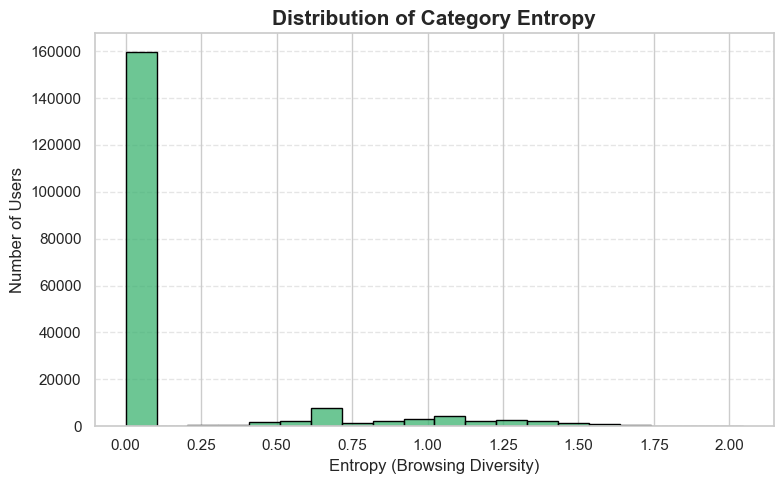

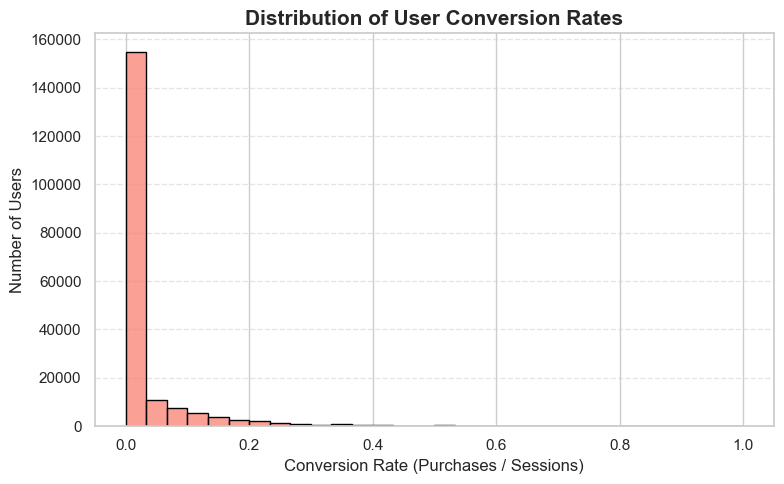

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=behavior, x='unique_categories_viewed', bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Categories Viewed per User', fontsize=15, weight='bold')
plt.xlabel('Unique Categories Viewed', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=behavior, x='category_entropy', bins=20, kde=False, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Category Entropy', fontsize=15, weight='bold')
plt.xlabel('Entropy (Browsing Diversity)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=behavior, x='conversion_rate', bins=30, kde=False, color='salmon', edgecolor='black')
plt.title('Distribution of User Conversion Rates', fontsize=15, weight='bold')
plt.xlabel('Conversion Rate (Purchases / Sessions)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [77]:
behavior['is_buyer'] = (behavior['unique_categories_viewed'] > 0).astype(int)

In [78]:
buyers = behavior[behavior['is_buyer'] == 1].copy()
non_buyers = behavior[behavior['is_buyer'] == 0].copy()

In [79]:
df = pd.concat([buyers, non_buyers], ignore_index=True)

df = df[df['income_group'] != 99]
income_labels = {1: 'Low', 2: 'Mid', 3: 'High', 99: 'Unknown'}
df['income_group_label'] = df['income_group'].map(income_labels)

In [80]:
df.to_csv('preprocessed.csv', index=False)
